In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [3]:
stocks = ["AAPL", "GOOG", "MSFT", "AMZN"]
start_date = "2022-01-01"
end_date = "2024-01-01"

In [4]:
stock_prices = {ticker: get_stock_data(ticker, start_date, end_date) for ticker in stocks}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
def plot_stock_prices(ticker, data):
    plt.figure(figsize=(12, 6))

    # Plotting opening and closing prices
    plt.subplot(3, 1, 1)
    plt.plot(data['Open'], label='Open')
    plt.plot(data['Close'], label='Close')
    plt.title(f'{ticker} - Opening and Closing Prices')
    plt.legend()

    # Plotting volume
    plt.subplot(3, 1, 2)
    plt.plot(data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume')
    plt.legend()

    # Calculating and plotting moving average
    data['MA'] = data['Close'].rolling(window=20).mean()
    plt.subplot(3, 1, 3)
    plt.plot(data['Close'], label='Close')
    plt.plot(data['MA'], label='Moving Average', linestyle='--')
    plt.title(f'{ticker} - Moving Average')
    plt.legend()

    plt.tight_layout()
    plt.show()

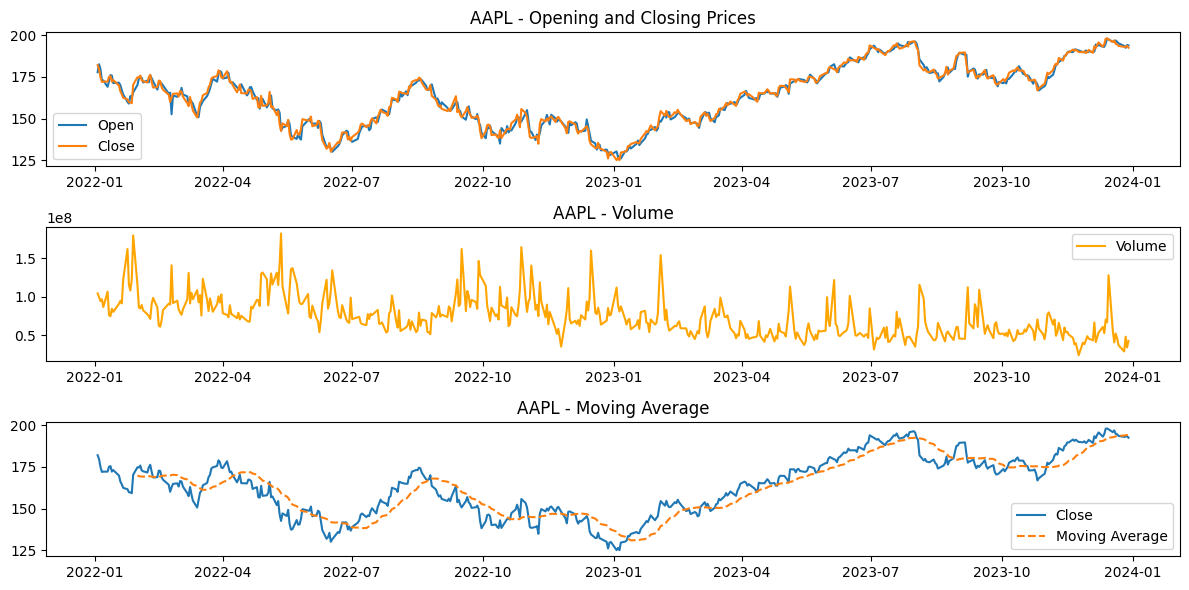

In [7]:
plot_stock_prices("AAPL", stock_prices["AAPL"])

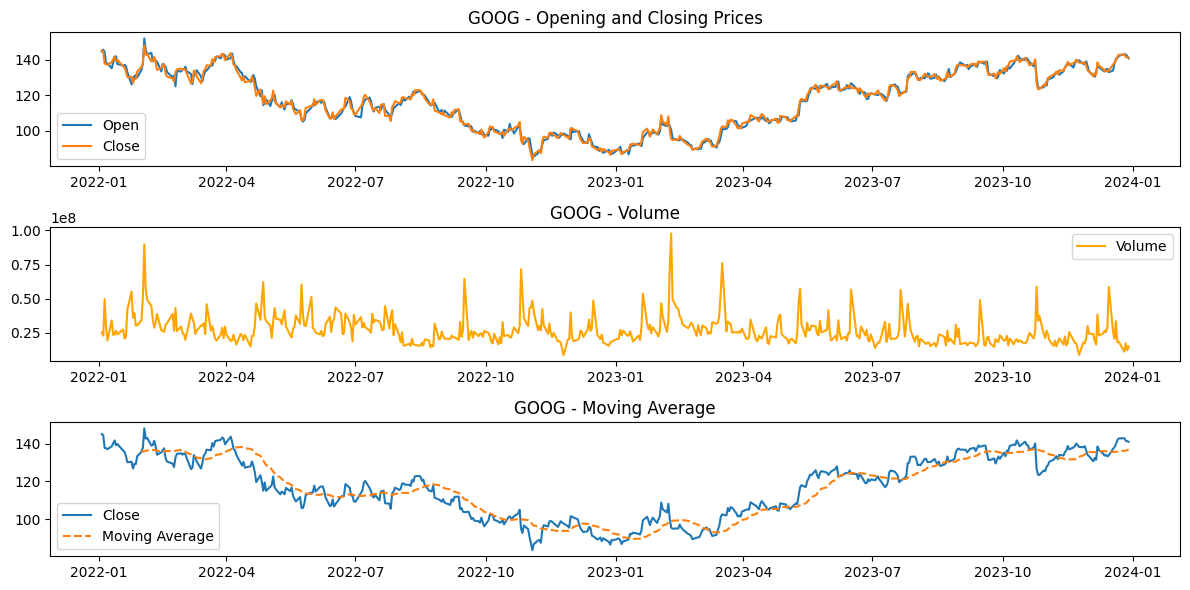

In [8]:
plot_stock_prices("GOOG", stock_prices["GOOG"])

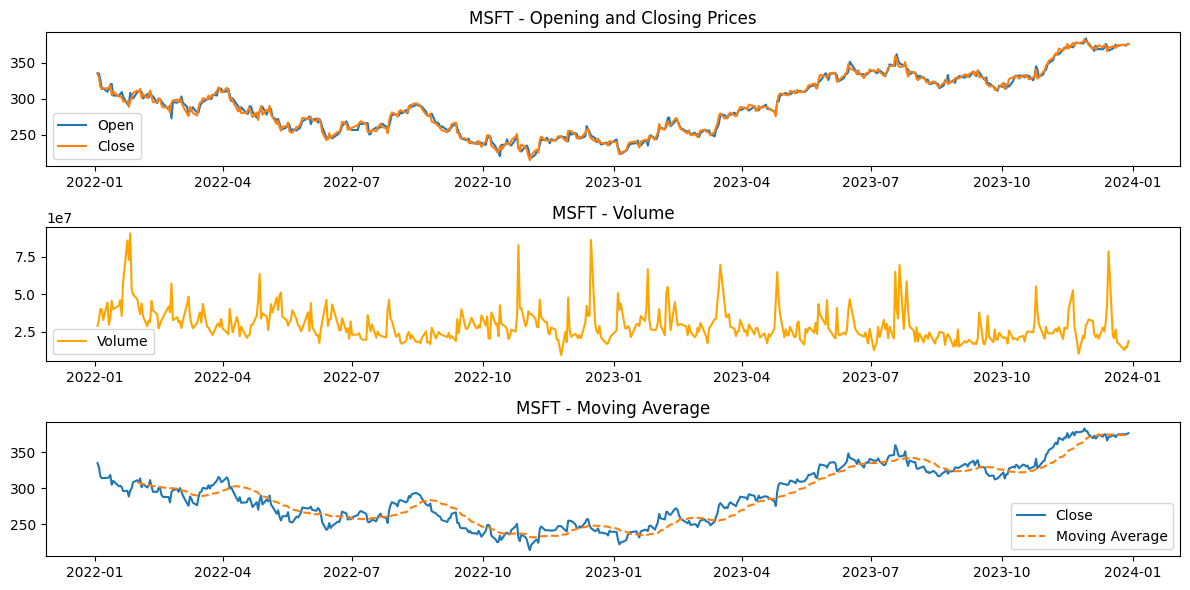

In [9]:
plot_stock_prices("MSFT", stock_prices["MSFT"])

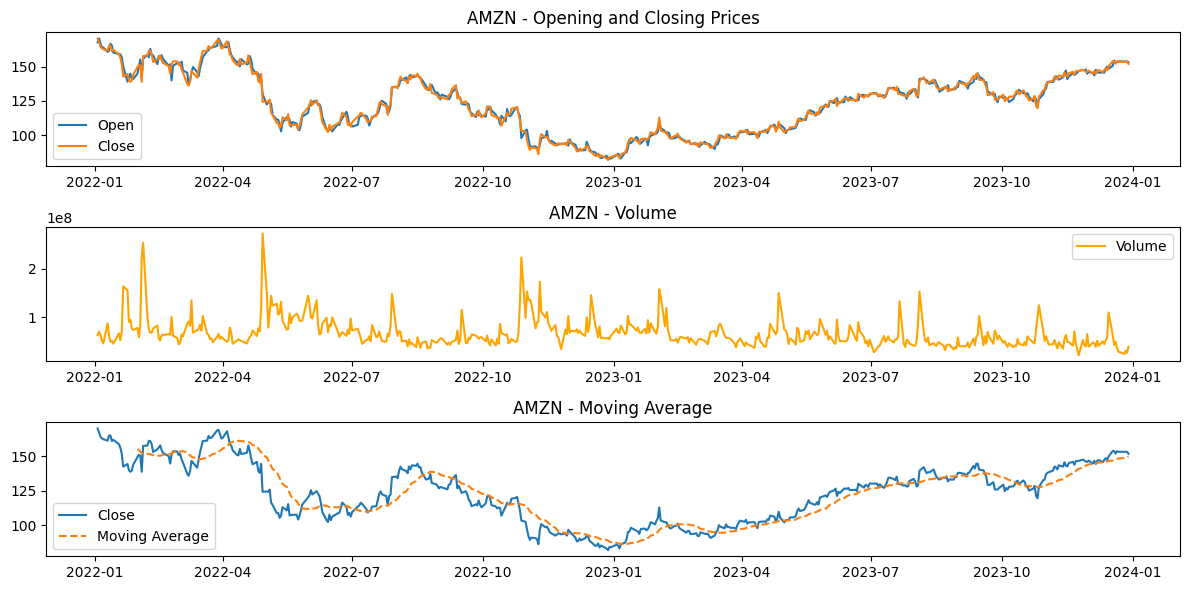

In [10]:
plot_stock_prices("AMZN", stock_prices["AMZN"])

In [16]:
def plot_returns(ticker, data):
    # Calculating daily returns
    data['Daily Returns'] = data['Close'].pct_change()

    # Plotting daily returns
    plt.figure(figsize=(12, 4))
    plt.plot(data['Daily Returns'])
    plt.title(f'{ticker} - Daily Returns')
    plt.show()

    #Plotting monthly returns
    data['Monthly Returns'] = data['Close'].pct_change().resample('M').sum()
    plt.figure(figsize=(12, 4))
    plt.plot(data['Monthly Returns'])
    plt.title(f'{ticker} - Monthly Returns')
    plt.show()

        
    # Plotting histogram for daily returns
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Daily Returns'].dropna(), bins=30, kde=True)
    plt.title(f'{ticker} - Daily Returns Histogram')
    plt.show()

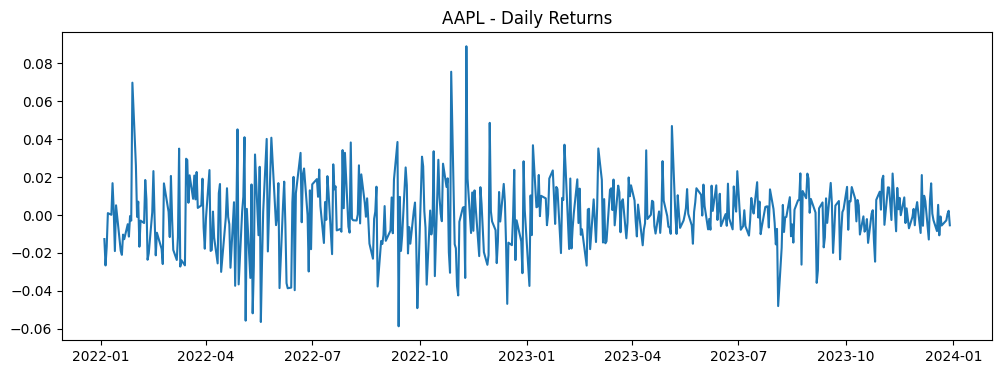

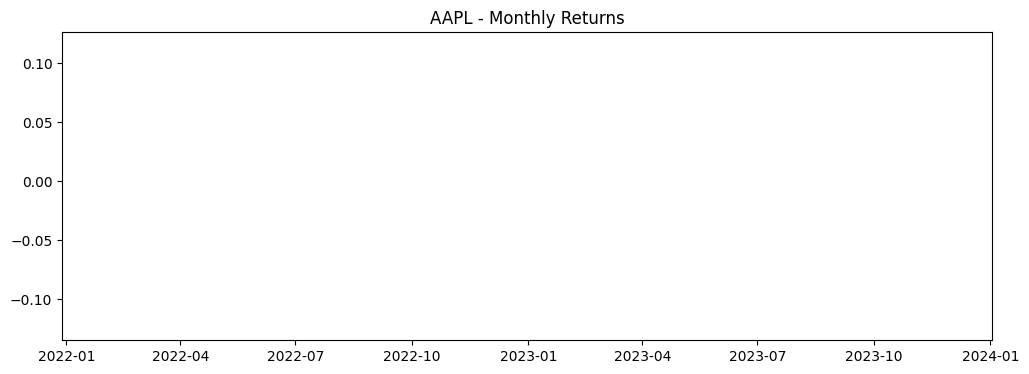

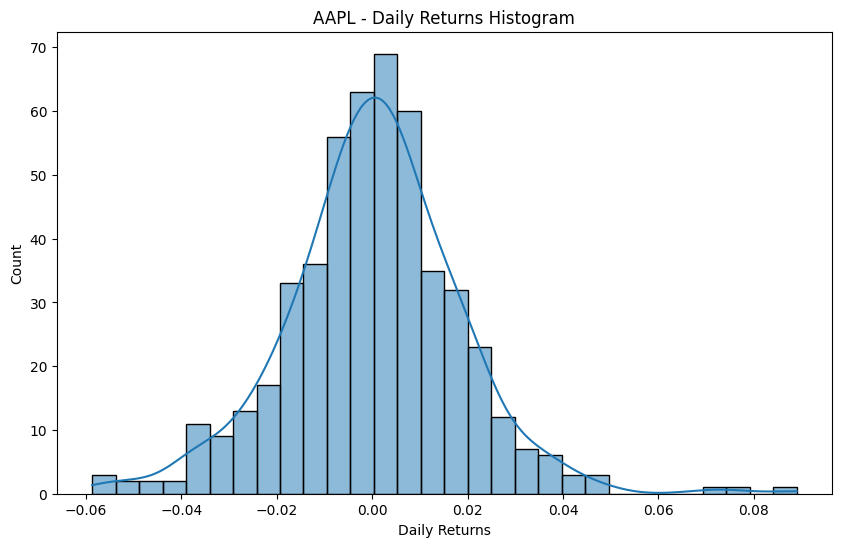

In [17]:
plot_returns("AAPL", stock_prices["AAPL"])

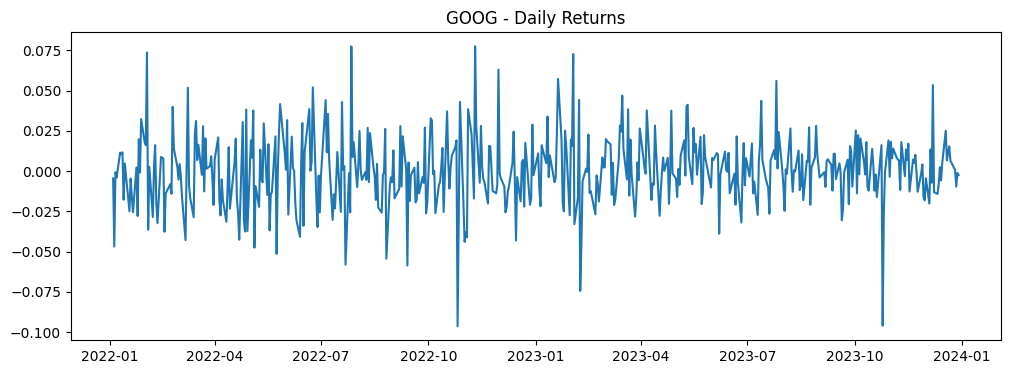

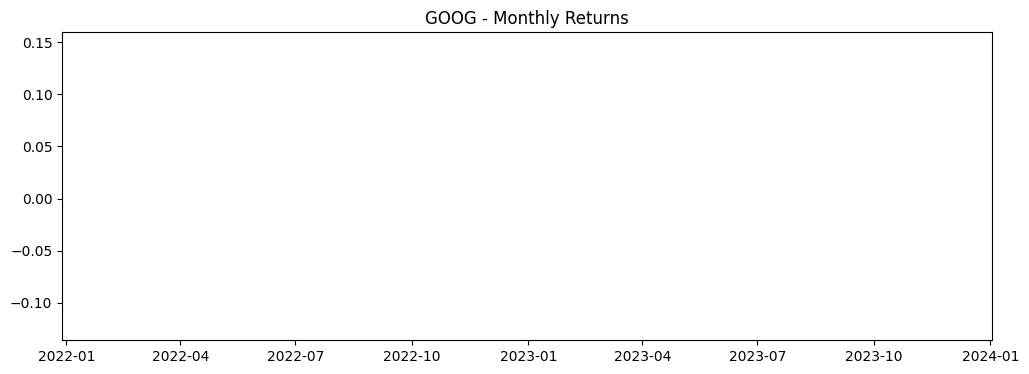

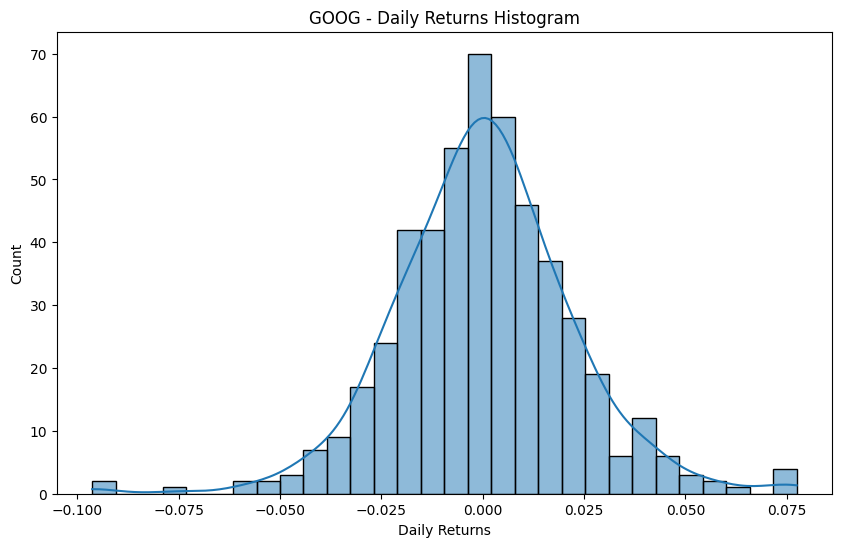

In [18]:
plot_returns("GOOG", stock_prices["GOOG"])

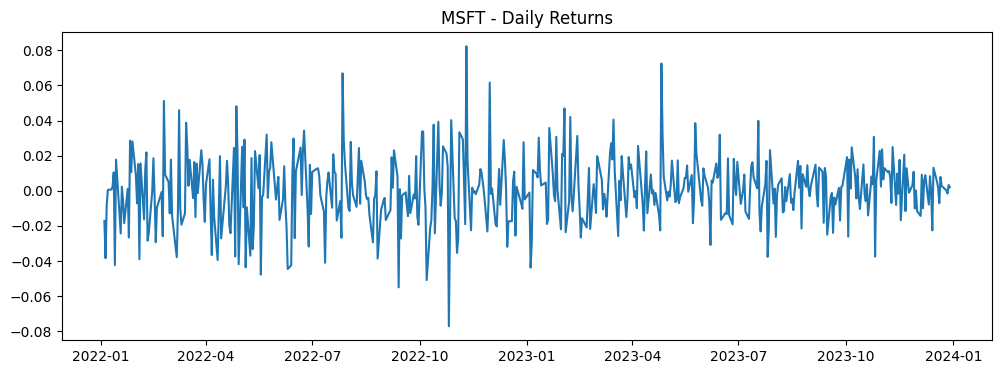

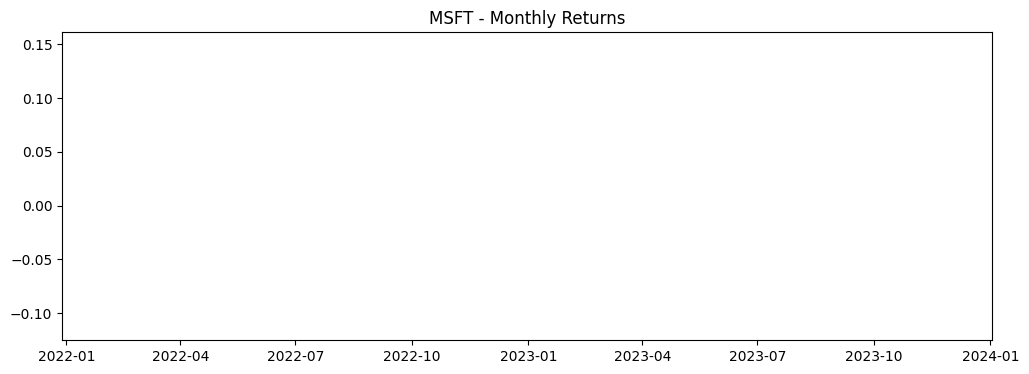

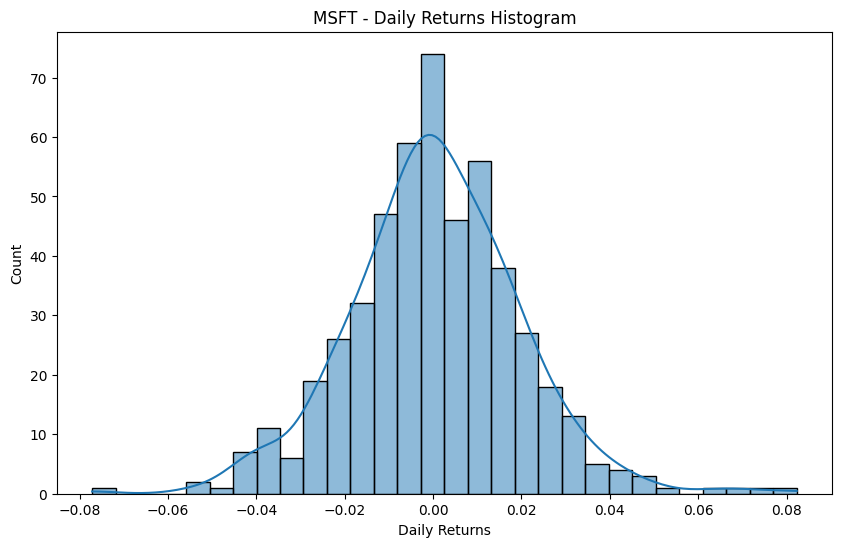

In [19]:
plot_returns("MSFT", stock_prices["MSFT"])

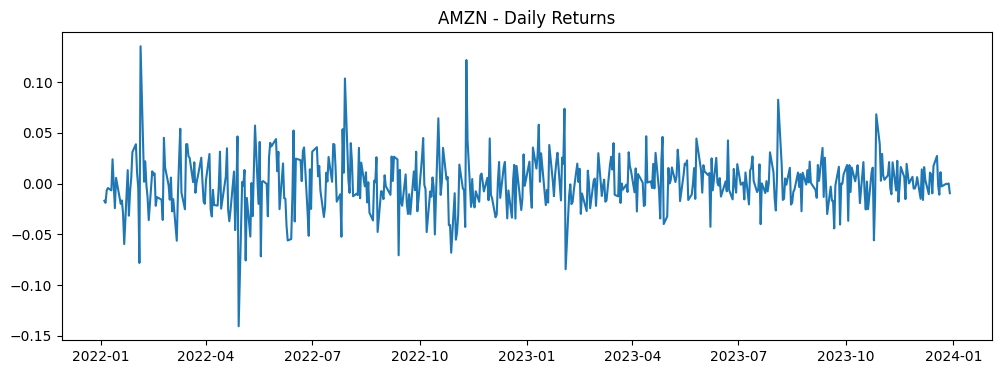

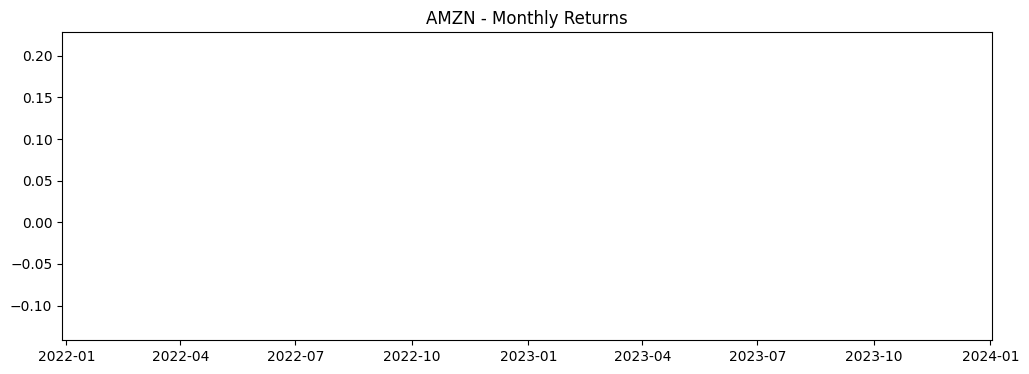

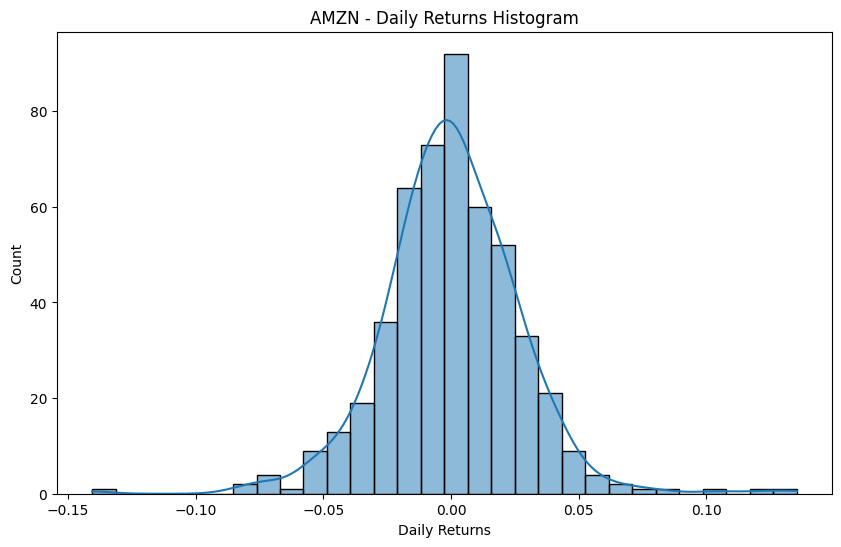

In [20]:
plot_returns("AMZN", stock_prices["AMZN"])

In [21]:
for ticker, data in stock_prices.items():
    data['Daily Returns'] = data['Close'].pct_change()

# Combining daily returns into a single DataFrame
returns_df = pd.DataFrame({ticker: data['Daily Returns'] for ticker, data in stock_prices.items()})
volume_df = pd.DataFrame({ticker: data['Volume'] for ticker, data in stock_prices.items()})


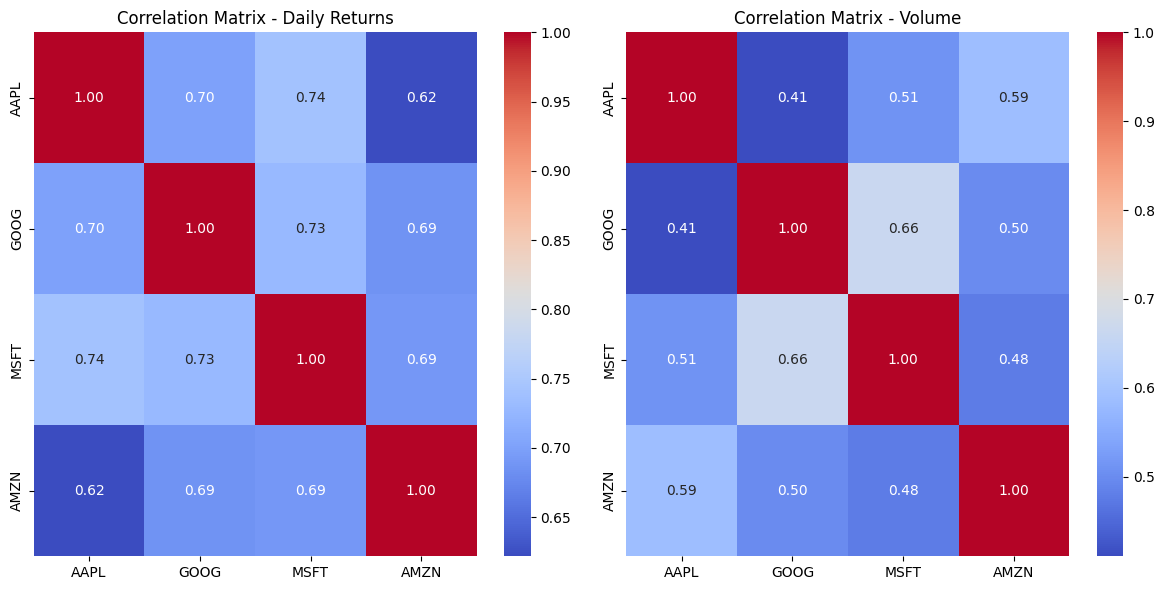

In [22]:
# Plotting correlation matrix for daily returns and volume
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Daily Returns')

plt.subplot(1, 2, 2)
sns.heatmap(volume_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Volume')

plt.tight_layout()
plt.show()

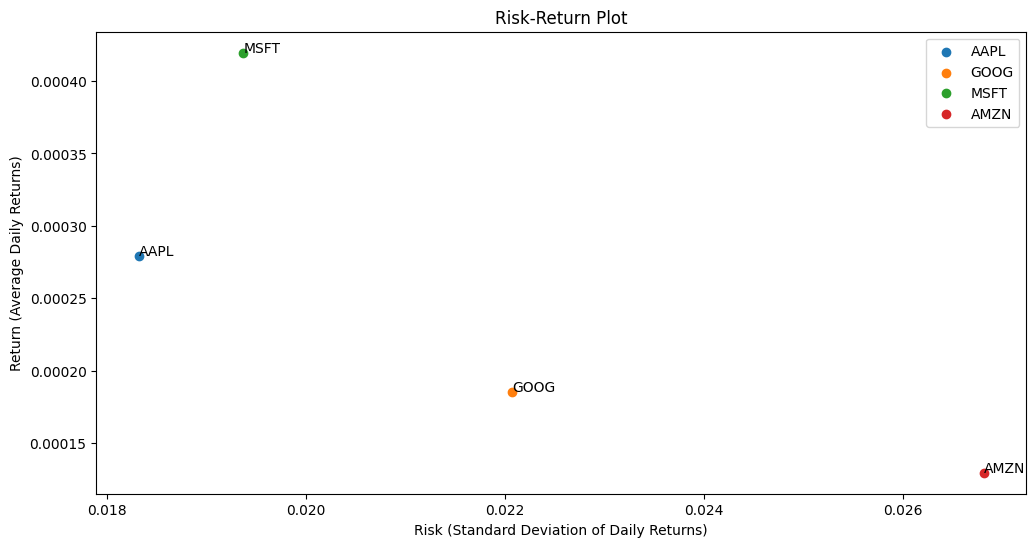

In [24]:
# Plotting risk-return plot
plt.figure(figsize=(12, 6))

for ticker, data in stock_prices.items():
    avg_return = data['Daily Returns'].mean()
    risk = data['Daily Returns'].std()

    plt.scatter(risk, avg_return, label=ticker)
    plt.text(risk, avg_return, ticker)

plt.title('Risk-Return Plot')
plt.xlabel('Risk (Standard Deviation of Daily Returns)')
plt.ylabel('Return (Average Daily Returns)')
plt.legend()
plt.show()